In [1]:
from heapq import merge
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
global numberOfClusters
arrIndex = []

def fromInput():
    data = []
    try:
        size = float(input("Size of matrix: "))
        for i in range(size):
            row = list(map(float, input(fr"Row {i}: ").strip().split()))
            numbers = np.array(row)
            if numbers.size != size:
                quit()
            data.append(numbers)
    except:
        print("Error")
        quit()
    return np.array(data)

def fromFile(path):
    try:
        data = []
        dataFile = open(path, "r")
        row = list(map(float, dataFile.readline().strip().split()))
        size = len(row)
        data.append(np.array(row))
        i = 1
        while size > i:
            numbers = np.array(list(map(float, dataFile.readline().strip().split())))
            if numbers.size != size:
                quit()
            data.append(numbers)
            i += 1
        dataFile.close()
    except:
        print("Error")
        quit()
    return np.array(data)

def get_edge_attributes(G, name):
    edges = G.edges(data=True)
    return dict( (x[:-1], x[-1][name]) for x in edges if name in x[-1] )

def findMinValue(data):
    minValue = 9223372036854775807
    iIndex = 0
    jIndex = 0
    for i in range(0, len(data)):
        for j in range(i + 1, len(data)):
            if minValue > data[i][j]:
                minValue = data[i][j]
                iIndex = i
                jIndex = j
    return minValue, iIndex, jIndex

def updateMatrix(data, mergeIndex1, mergeIndex2, newCluster):
    newIndex = 0
    if mergeIndex1 > mergeIndex2:
        arr = data[:][mergeIndex1]
        arr = np.delete(arr, mergeIndex1)
        data = np.delete(data, mergeIndex1, axis=0)
        data = np.delete(data, mergeIndex1, axis=1)
        newIndex = mergeIndex2
    else:
        arr = data[:][mergeIndex2]
        arr = np.delete(arr, mergeIndex2)
        data = np.delete(data, mergeIndex2, axis=0)
        data = np.delete(data, mergeIndex2, axis=1)
        newIndex = mergeIndex1
    arrIndex.pop(mergeIndex2)
    arrIndex.pop(mergeIndex1)
    arrIndex.insert(newIndex, newCluster)
    for i in range(len(data[0])):
        data[i, newIndex] = ((arr[i]) + (data[i][newIndex]))/2.0
        data[newIndex, i] = data[i][newIndex]
    data[newIndex, newIndex] = 0.0
    return data, newIndex

def algorithm(data):
    numberOfClusters = 0
    for i in range(len(data[0])):
        newLeaf = "L"+str(i)
        G.add_node(newLeaf)
        arrIndex.append([newLeaf, 0])
    while(len(data[0]) > 1):
        minValue, iIndex, jIndex = findMinValue(data)
        newCluster = ["C"+str(numberOfClusters), minValue/2.0]
        G.add_node(newCluster[0])
        G.add_edge(arrIndex[iIndex][0], newCluster[0], weight=newCluster[1] - arrIndex[iIndex][1])
        G.add_edge(arrIndex[jIndex][0], newCluster[0], weight=newCluster[1] - arrIndex[jIndex][1])
        numberOfClusters+=1
        data, newIndex = updateMatrix(data, iIndex, jIndex, newCluster)
    return data

Nodes: ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5']
Edges with weights: {('L0', 'C1'): 4.0, ('L1', 'C0'): 0.5, ('L2', 'C4'): 14.1875, ('L3', 'C1'): 4.0, ('L4', 'C5'): 18.21875, ('L5', 'C0'): 0.5, ('L6', 'C2'): 6.25, ('C0', 'C2'): 5.75, ('C1', 'C3'): 3.875, ('C2', 'C3'): 1.625, ('C3', 'C4'): 6.3125, ('C4', 'C5'): 4.03125}


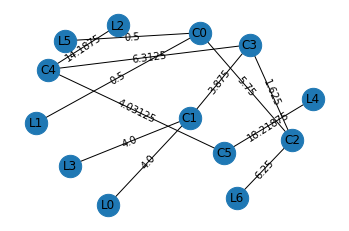

In [2]:
if __name__=='__main__':
    #data = fromInput()
    data = fromFile(fr"input\test3.txt")
    algorithm(data)
    pos = nx.spring_layout(G, k=2.15, iterations=20)
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, node_size=500,edge_cmap=plt.cm.Reds,with_labels=True)
    print("Nodes:",G.nodes)
    print("Edges with weights:", get_edge_attributes(G, "weight"))